**Author**: Rajendra Karki

**Title**: Parsing

Component extration from text based on grammer or rule.

In [1]:
import nltk

In [2]:
# Grammer
# 1. String variable
# 2. File (*.cfg)

# from nltk import nltk
# grammar = CFG.fromstring()
# OR
# from nltk.CFG import *
# grammar = fromstring()
# OR
grammar = nltk.CFG.fromstring(
"""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'                              
V -> 'shot'
P -> 'in'                             
""")
grammar

<Grammar with 13 productions>

In [3]:
grammar.start()

S

In [4]:
grammar.productions()

[S -> NP VP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 V -> 'shot',
 P -> 'in']

In [5]:
lhs_np = grammar.productions(lhs=nltk.Nonterminal('NP'))
print(lhs_np)

[NP -> Det N, NP -> Det N PP, NP -> 'I']


In [6]:
rhs_det = grammar.productions(rhs=nltk.Nonterminal('Det'))
print(rhs_det)

[NP -> Det N, NP -> Det N PP]


Now check for a sentence using the grammer

In [7]:
sent = 'I shot an elephant in my pajamas'
sent_tokens = sent.split()
print(sent_tokens)

['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']


In [8]:
parser = nltk.ChartParser(grammar)
parsed_trees = list(parser.parse(sent_tokens))
print(parser.grammar().productions())
len(parsed_trees)

[S -> NP VP, PP -> P NP, NP -> Det N, NP -> Det N PP, NP -> 'I', VP -> V NP, VP -> VP PP, Det -> 'an', Det -> 'my', N -> 'elephant', N -> 'pajamas', V -> 'shot', P -> 'in']


2

In [9]:
print(parsed_trees[0])

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


A new grammar for new sentence.

In [10]:
grammar2 = nltk.CFG.fromstring(
'''
S -> NP VP
NP -> Det N | NP PP
PP -> Pre NP
VP -> V NP
Det -> 'a' | 'the'
N -> 'cake' | 'child' | 'fork'
Pre -> 'with'
V -> 'ate'
'''
)
grammar2

<Grammar with 12 productions>

In [11]:
sent2 = 'a child ate a cake with the fork'
sent_tokens2 = sent2.split()
print(sent_tokens2)

parser2 = nltk.ChartParser(grammar2)
parsed_trees2 = list(parser2.parse(sent_tokens2))
print(parser2.grammar().productions())
print(len(parsed_trees2))
print(parsed_trees2[0])

['a', 'child', 'ate', 'a', 'cake', 'with', 'the', 'fork']
[S -> NP VP, NP -> Det N, NP -> NP PP, PP -> Pre NP, VP -> V NP, Det -> 'a', Det -> 'the', N -> 'cake', N -> 'child', N -> 'fork', Pre -> 'with', V -> 'ate']
1
(S
  (NP (Det a) (N child))
  (VP
    (V ate)
    (NP
      (NP (Det a) (N cake))
      (PP (Pre with) (NP (Det the) (N fork))))))


In [12]:
for tree in parsed_trees:
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


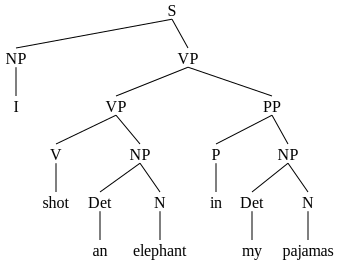

In [13]:
parsed_trees[0]

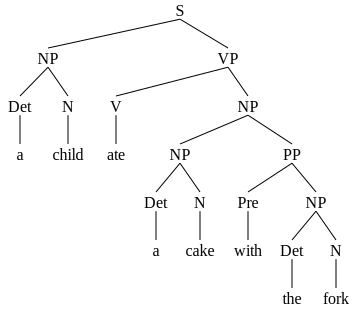

In [14]:
parsed_trees2[0]

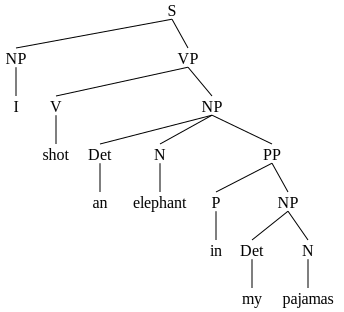

In [15]:
parsed_trees[1]